In [2]:
#svm for parkinsons in python
#cs491 prof.kahanda
#Dyanell, Faniz, Jeison

#imports we will be using for this project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
#creating the data frames for each of our classes
h_df = pd.read_csv('healthy control data repo\healthycomplete.csv')
et_df =  pd.read_csv('essentialTremour\essentialcomplete.csv')
parkinsons_df = pd.read_csv('parkinsons data repo\parkinsonscomplete.csv')

In [4]:
#calling the dataframe + head to see what the data frame looks like
#since they are all formatted the same way, we will only call on one
h_df.head()



,Unnamed: 0,TimeStamp(epoch),mAccelerometerMagnitude(m/s^2),mAccelerometerX(m/s^2),mAccelerometerY(m/s^2),mAccelerometerZ(m/s^2),mGyroscopeMagnitude(rad/s),mGyroscopeX(rad/s),mGyroscopeY(rad/s),mGyroscopeZ(rad/s)
0,0,1566316522372,10.019530,0.991538,6.049819,7.925120,0.905952,0.573112,-0.698813,-0.062851
1,1,1566316522380,13.023696,-0.502954,6.337222,11.366763,0.925801,0.655138,-0.654072,-0.009587
2,2,1566316522380,13.466437,-0.670605,6.320457,11.872112,0.960038,0.755273,-0.590156,0.054328
3,3,1566316522394,13.802365,-0.579595,6.318062,12.257710,0.983773,0.827711,-0.521980,0.101200
4,4,1566316522394,13.968290,-0.522114,6.406678,12.401412,0.993939,0.875647,-0.445281,0.151268


In [5]:
#calling the shape func to see the size of each class
print (h_df.shape, et_df.shape, parkinsons_df.shape)

(331983, 10) (261933, 10) (346191, 11)


In [6]:
#going to drop irrelevant columns from my data frames and saving that change
h_df.drop(h_df.columns[[0,2,6]], axis=1, inplace=True)


In [7]:
#new dimenstions of df
h_df.shape

(331983, 7)

In [8]:
#post dropping columns
h_df.head()


,TimeStamp(epoch),mAccelerometerX(m/s^2),mAccelerometerY(m/s^2),mAccelerometerZ(m/s^2),mGyroscopeX(rad/s),mGyroscopeY(rad/s),mGyroscopeZ(rad/s)
0,1566316522372,0.991538,6.049819,7.925120,0.573112,-0.698813,-0.062851
1,1566316522380,-0.502954,6.337222,11.366763,0.655138,-0.654072,-0.009587
2,1566316522380,-0.670605,6.320457,11.872112,0.755273,-0.590156,0.054328
3,1566316522394,-0.579595,6.318062,12.257710,0.827711,-0.521980,0.101200
4,1566316522394,-0.522114,6.406678,12.401412,0.875647,-0.445281,0.151268


In [9]:
#repeating that process two more times for the other classes
et_df.drop(et_df.columns[[0,2,6]], axis=1, inplace=True)



In [10]:
et_df.head()


,TimeStamp(epoch),mAccelerometerX(m/s^2),mAccelerometerY(m/s^2),mAccelerometerZ(m/s^2),mGyroscopeX(rad/s),mGyroscopeY(rad/s),mGyroscopeZ(rad/s)
0,1574191816923,5.106182,-2.318379,6.595884,0.304666,0.017044,0.154463
1,1574191816923,5.197193,-2.251319,6.370752,0.320645,0.022371,0.124636
2,1574191816929,4.713399,-2.500401,8.169412,0.325971,0.023436,0.116114
3,1574191816929,4.722979,-2.418970,8.049661,0.298274,0.027697,0.106526
4,1574191816930,4.639153,-2.459685,7.029383,0.269512,0.008522,0.073503


In [11]:
parkinsons_df.head()

,Unnamed: 0,TimeStamp(epoch),mAccelerometerMagnitude(m/s^2),mAccelerometerX(m/s^2),mAccelerometerY(m/s^2),mAccelerometerZ(m/s^2),mGyroscopeMagnitude(rad/s),mGyroscopeX(rad/s),mGyroscopeY(rad/s),mGyroscopeZ(rad/s),mGyroscopeZ(rad/s)
0,0,1567788862015,11.736408,4.974456,3.506309,10.035132,1.123515,0.557133,-0.962999,-0.156594,NaN
1,1,1567788862026,11.684967,5.007986,3.618874,9.917776,1.197819,0.612527,-1.010936,-0.193878,NaN
2,2,1567788862027,11.895511,5.173243,3.688330,10.056687,1.283684,0.656203,-1.081243,-0.219444,NaN
3,3,1567788862035,11.865849,5.249883,3.800896,9.939331,1.389009,0.709466,-1.166465,-0.255663,NaN
4,4,1567788862036,11.993441,5.206773,3.824846,10.104588,1.504820,0.764860,-1.265534,-0.279099,NaN


In [12]:
parkinsons_df.drop(parkinsons_df.columns[[0,2,6,10]], axis=1, inplace=True)

In [13]:
parkinsons_df.head()

,TimeStamp(epoch),mAccelerometerX(m/s^2),mAccelerometerY(m/s^2),mAccelerometerZ(m/s^2),mGyroscopeX(rad/s),mGyroscopeY(rad/s),mGyroscopeZ(rad/s)
0,1567788862015,4.974456,3.506309,10.035132,0.557133,-0.962999,-0.156594
1,1567788862026,5.007986,3.618874,9.917776,0.612527,-1.010936,-0.193878
2,1567788862027,5.173243,3.688330,10.056687,0.656203,-1.081243,-0.219444
3,1567788862035,5.249883,3.800896,9.939331,0.709466,-1.166465,-0.255663
4,1567788862036,5.206773,3.824846,10.104588,0.764860,-1.265534,-0.279099


In [14]:
#here we will make subsets of our df's to better implement them into svm
#for this excersize we will  just take the time and x accereration from each df
#since we have a vast quantity of data we will take a subset of that data so we dont overwhelm the SVM or use too many computer resources
#we will use a subset of 10000 data points 
sub_h_df = h_df[["TimeStamp(epoch)","mAccelerometerX(m/s^2)"]][0:10000]
sub_et_df = et_df[["TimeStamp(epoch)","mAccelerometerX(m/s^2)"]][0:10000]
sub_p_df = parkinsons_df[["TimeStamp(epoch)","mAccelerometerX(m/s^2)"]][0:10000]

<AxesSubplot: xlabel='TimeStamp(epoch)', ylabel='mAccelerometerX(m/s^2)'>

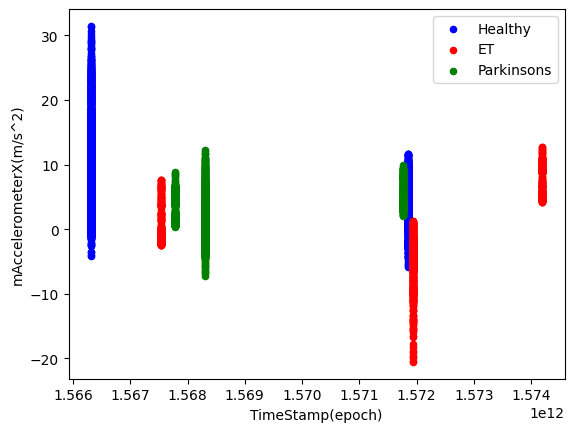

In [15]:
#gonna try to scatter plot one of our sub df's to see what they look like
#this is to get a rough idea of how the different classes differ via graphical rep

axis = sub_h_df.plot(kind='scatter', x='TimeStamp(epoch)', y='mAccelerometerX(m/s^2)', color='blue', 
              label='Healthy')
sub_et_df.plot(kind='scatter', x='TimeStamp(epoch)', y='mAccelerometerX(m/s^2)', color='red', 
              label='ET', ax=axis)
sub_p_df.plot(kind='scatter', x='TimeStamp(epoch)', y='mAccelerometerX(m/s^2)', color='green', 
             label='Parkinsons', ax=axis)


In [73]:
#now we have to process the data because there are missing values within each of the classes
#makes gives us errors in the svm so we will fill in those gaps with just the avg values along the respective columns
h_df.isnull().sum().sum()
et_df.isnull().sum().sum()
parkinsons_df.isnull().sum().sum()

3931

In [67]:
#creating array's to pass into a variable to later pass into svm
x1_h = (h_df[["mAccelerometerX(m/s^2)"]])
x2_h = (h_df[["mAccelerometerY(m/s^2)"]])
x3_h = (h_df[["mAccelerometerZ(m/s^2)"]])
x4_h = (h_df[["mGyroscopeX(rad/s)"]])
x5_h = (h_df[["mGyroscopeY(rad/s)"]])
x6_h = (h_df[["mGyroscopeZ(rad/s) "]])
x7_h = (h_df[["TimeStamp(epoch)"]])

#combining all the features into a new var that we will later concatenate into another var to pass onto for the training/testing split
#we need a 2d x and a 1d y to pass onto the svm
#we make the 1d y by mult the len of healthy by 0 to indicate healthy and the len of the other classes by 1 to indicate not-healthy then concatenating them. The length of x and y will mathch at the end.
X_healthy = np.concatenate((x1_h, x2_h, x3_h, x4_h, x5_h, x6_h, x7_h), axis=1)
y_healthy = np.asarray([0] * len(X_healthy))
#repeating this step for the other classes

x1_et = (et_df[["mAccelerometerX(m/s^2)"]])
x2_et = (et_df[["mAccelerometerY(m/s^2)"]])
x3_et = (et_df[["mAccelerometerZ(m/s^2)"]])
x4_et = (et_df[["mGyroscopeX(rad/s)"]])
x5_et = (et_df[["mGyroscopeY(rad/s)"]])
x6_et = (et_df[["mGyroscopeZ(rad/s) "]])
x7_et = (et_df[["TimeStamp(epoch)"]])

X_et = np.concatenate((x1_et, x2_et, x3_et, x4_et, x5_et, x6_et, x7_et), axis=1)
y_et = np.asarray([1] * len(X_et))

x1_p = (parkinsons_df[["mAccelerometerX(m/s^2)"]])
x2_p = (parkinsons_df[["mAccelerometerY(m/s^2)"]])
x3_p = (parkinsons_df[["mAccelerometerZ(m/s^2)"]])
x4_p = (parkinsons_df[["mGyroscopeX(rad/s)"]])
x5_p = (parkinsons_df[["mGyroscopeY(rad/s)"]])
x6_p = (parkinsons_df[["mGyroscopeZ(rad/s) "]])
x7_p = (parkinsons_df[["TimeStamp(epoch)"]])

X_p = np.concatenate((x1_p, x2_p, x3_p, x4_p, x5_p, x6_p, x7_p), axis=1)
y_p = np.asarray([1] * len(X_p))

#making our var's for svm
X,Y = np.concatenate((X_healthy, X_et, X_p)), np.concatenate((y_healthy, y_et, y_p))



In [68]:
#checking to see if length is correct size
print(len(X),len(Y))

940107 940107


In [69]:
#next step is to down sample the data bc otherwise it'll take all night for svm to process
from sklearn.utils import resample

X_ds = resample(X, replace=False, n_samples=50000, random_state=12 )
Y_ds = resample(Y, replace=False, n_samples=50000, random_state=12 )

In [74]:
#using this cell to divide test and train data for svm 
#going to split heathy class to train(80% of the date) and test (20% of the data)
#Train(X, Y) -> X is a 2d array and y is 1d. this tracks with the parameters of using svm

#need to import sci kit for svm
#random state is method for generating random values
#since we only called 20% to be test data, rest is trainning
from sklearn.model_selection import train_test_split

#this will output 4 arrays from the data
#we can also use the shape command on this arrays to see their size/shape
X_train, X_test, Y_train, Y_test = train_test_split(X_ds, Y_ds, test_size=0.2, random_state=2)

print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
#x train (40000, 7)
#x test (10000, 7)
#y train (40000,)
#y test (10000,)

(40000, 7) (10000, 7) (40000,) (10000,)


In [83]:
#importing svm

from sklearn import svm

#using impute to fill to handle the Nan values in x by filling gaps with and est mean value
#standardizing our data set with standard scaler -> gave us incr accuracy

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp = imp.fit(X_train)
scl = StandardScaler()
X_train_imp = imp.transform(X_train)
X_test_imp = imp.transform(X_test)

X_train_imp_scl = scl.fit_transform(X_train_imp)
X_test_imp_scl = scl.fit_transform(X_test_imp)

#using rbf kernel bc its more accurate than linaer, despite it being slower

clf = svm.SVC(kernel='rbf', C=1, gamma='auto', class_weight='balanced')
clf.fit(X_train_imp_scl, Y_train)

#prediction for Y, what we are looking for!
Y_predict = clf.predict(X_test_imp_scl)

In [84]:
#evaluating results using sklean metrics
#precision meanas how accurate the data is by adding the true ratio + error 
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_predict))

              precision    recall  f1-score   support

           0       0.62      0.93      0.74      3552
           1       0.95      0.69      0.80      6448

    accuracy                           0.77     10000
   macro avg       0.78      0.81      0.77     10000
weighted avg       0.83      0.77      0.78     10000



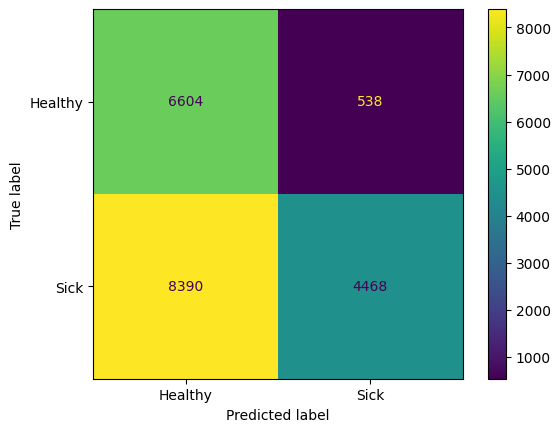

In [51]:
#confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(Y_test, Y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=['Healthy', "Sick"])
disp.plot()